<a href="https://colab.research.google.com/github/zi10ge/CW/blob/master/%D0%A2%D1%80%D0%B5%D0%B9%D0%B4%D0%B8%D0%BD%D0%B3_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

данные можно брать с инвестинга 

https://ru.investing.com/equities/alibaba-historical-data

с яхуфинанс

https://finance.yahoo.com/quote/ETSY/history?p=ETSY

с наждака

https://www.nasdaq.com/market-activity/stocks/etsy/historical

In [ ]:
!pip -q install terra_ai
from terra_ai import терра_ии



Все необходимые библиотеки установлены и готовы к работе


In [ ]:
!pip list

In [ ]:
!python --version


Python 3.7.11


In [ ]:
# Загружаем базу ТРЕЙДИНГ
терра_ии.загрузить_базу('ТРЕЙДИНГ', справка='Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/shares.zip
Загружены базы акций трех вариантов: полиметаллы, газпром и яндекс



In [ ]:
# Формируем обучающую и тестовые выборки
количество_анализируемых_дней=10
период_предсказания=1
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), данные  = терра_ии.создать_выборки_для_торговли(
    акции= 'Газпром',
    количество_анализируемых_дней=количество_анализируемых_дней,
    период_предсказания=период_предсказания)

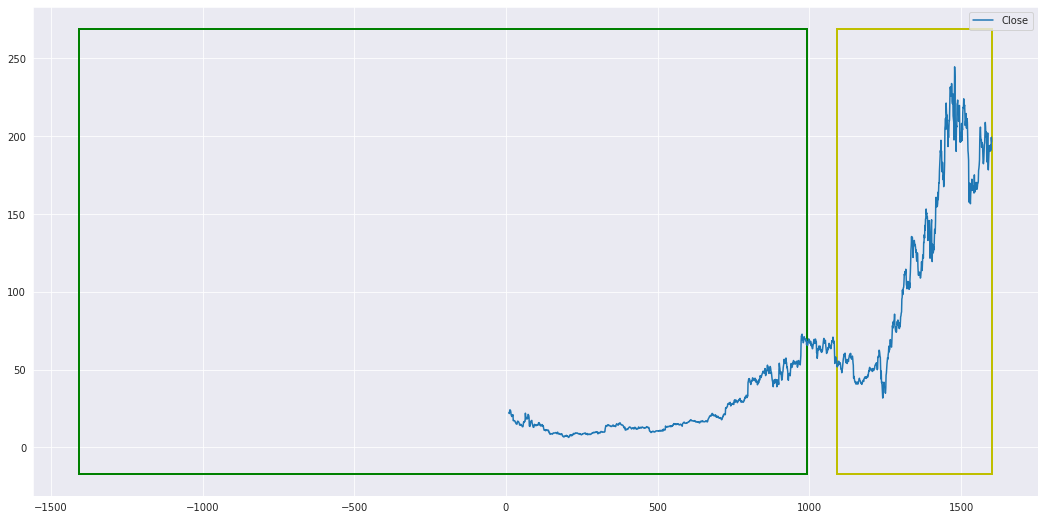

In [ ]:
# Посмотреть данные
терра_ии.показать_примеры_для_трейдинга(данные)

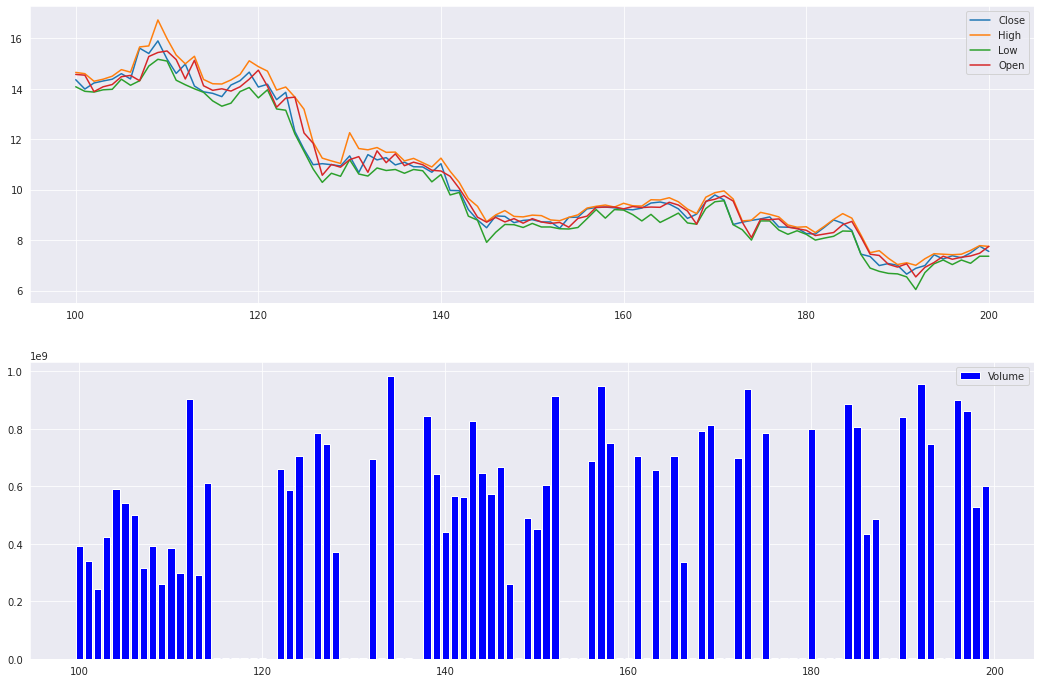

In [ ]:
терра_ии.показать_примеры_для_интервала(данные, 100,200) # Укажите интервал, где первое число начало интервала, а второе число окончание 

In [ ]:
# Указываем слои для создания модели
слои = 'Сверточный1D-16-5\
 Сверточный1D-32-5\
 Выравнивающий Полносвязный-512 Полносвязный-3'

# Получаем размер входных данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_1 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача = 'временной ряд'
    )

Создана модель нейронной сети!


In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка_1)

Задайте параметры для обучения модели:

Нейронка
Обучающая и проверочная выборки
Размер пакета
Количество эпох

Эпоха №1    Время обучения: 1.15c   Точность на обучающей выборке: 50.71%    Точность на проверочной выборке: 69.0%
Эпоха №2    Время обучения: 0.41c   Точность на обучающей выборке: 63.52%    Точность на проверочной выборке: 79.0%
Эпоха №3    Время обучения: 0.46c   Точность на обучающей выборке: 69.73%    Точность на проверочной выборке: 80.67%
Эпоха №4    Время обучения: 0.48c   Точность на обучающей выборке: 74.14%    Точность на проверочной выборке: 69.0%
Эпоха №5    Время обучения: 0.41c   Точность на обучающей выборке: 78.22%    Точность на проверочной выборке: 80.0%
Эпоха №6    Время обучения: 0.45c   Точность на обучающей выборке: 80.35%    Точность на проверочной выборке: 76.67%
Эпоха №7    Время обучения: 0.36c   Точность на обучающей выборке: 82.23%    Точность на проверочной выборке: 76.67%
Эпоха №8    Время обучения: 0.37c   Точность на обучающей выборке: 83.41%    Точность на проверочной выборке: 79.67%
Эпоха №9    Время обучения: 0.38c   Точность на обучающей выборке: 8

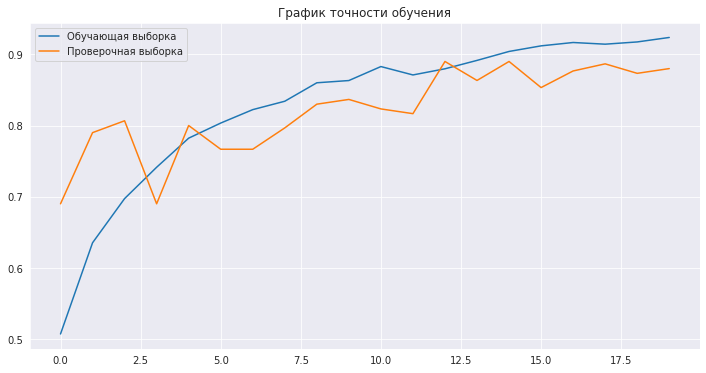

In [ ]:
# Обучаем модель
эксперимент = терра_ии.обучение_модели(
    нейронка_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
терра_ии.тест_модели_торговли(
    нейронка_1, 
    тестовая_выборка, метки_тестовой_выборки,
    данные,
    период_предсказания,
    количество_анализируемых_дней)

Тестрирование модели:   0%|                                                                                   …

Результат теста:
  * Количество отсчетов: 300
  * Правильных предсказаний: 267
  * Ошибочных предсказаний:  33

  * Точность предсказаний: 89.0%


Примеры распознавания

________________________________________
Тест №1
Модель предсказала: растущий тренд
Правильный ответ:  растущий тренд
Текущая цена:  131.44
Цена через 1  интервал(а): 138.41


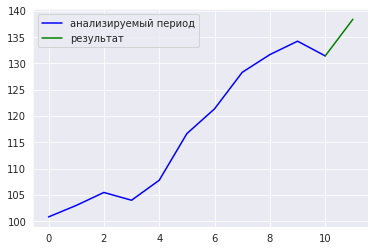

________________________________________
Тест №2
Модель предсказала: падающий тренд
Правильный ответ:  падающий тренд
Текущая цена:  131.31
Цена через 1 интервал(а): 130.2


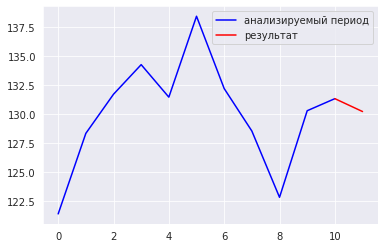

________________________________________
Тест №3
Модель предсказала: растущий тренд
Правильный ответ:  растущий тренд
Текущая цена:  130.2
Цена через 1  интервал(а): 131.7


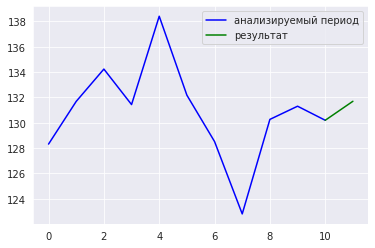

________________________________________
Тест №4
Модель предсказала: нейтральный тренд
Правильный ответ:  нейтральный тренд
Текущая цена:  130.45
Цена через 1 интервал(а): 130.0


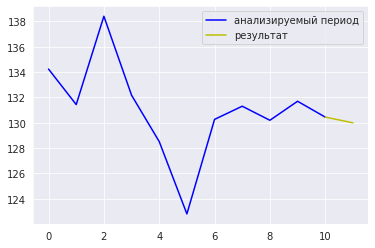

In [ ]:
терра_ии.примеры_распознавания(нейронка_1, 
          период_предсказания, 
          количество_анализируемых_дней)

Стартовый капитал: 100000
Прирост после торгов: + 1365742
Итого: 1465742


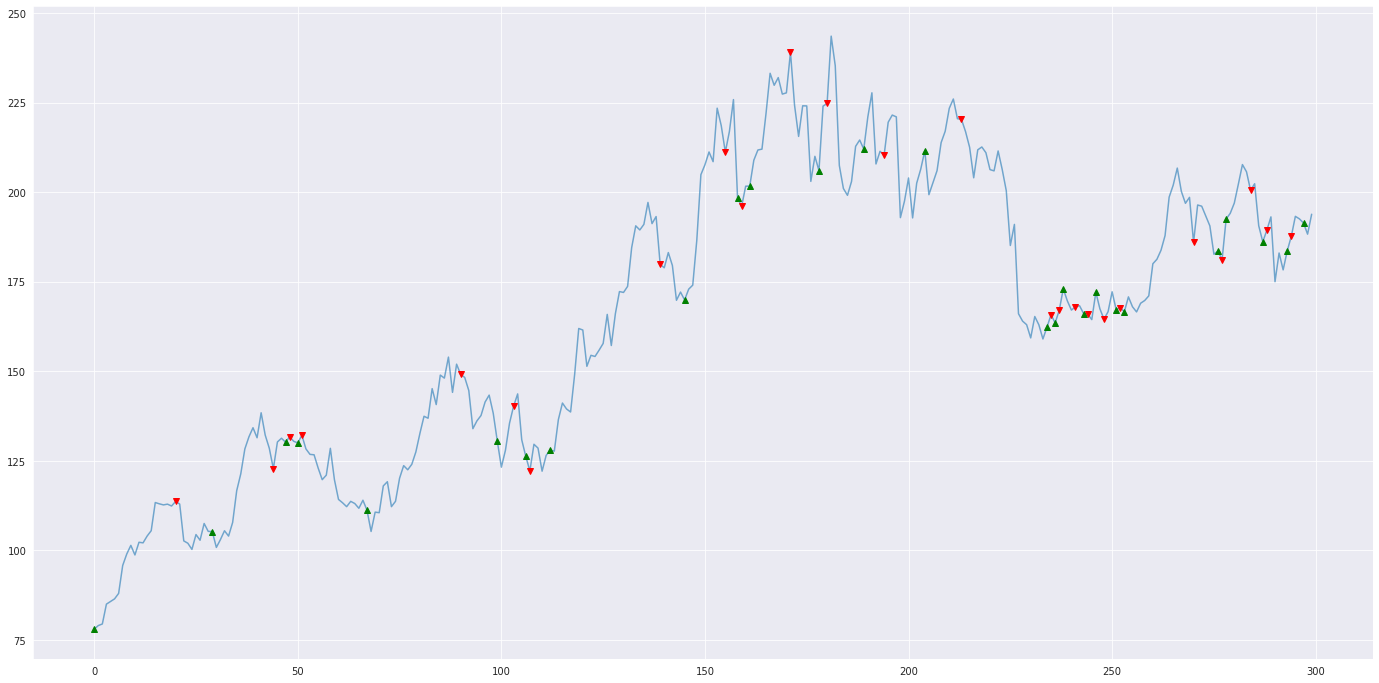

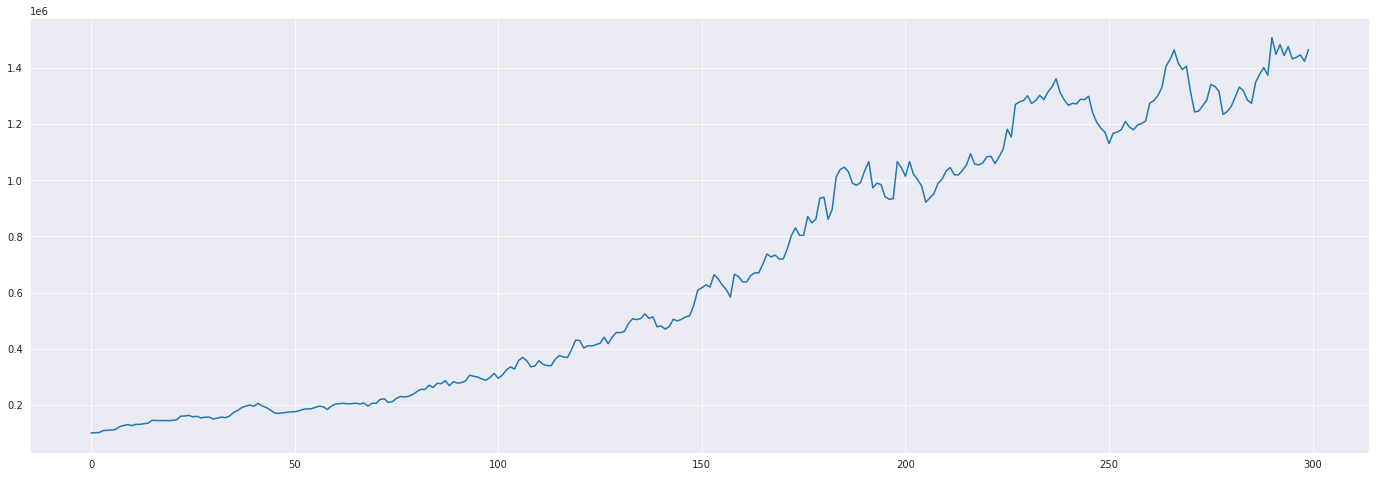

In [ ]:
# для мгновенного вывода результата укажите значение параметра тип='результат'  'процесс'
терра_ии.торговля(нейронка_1, тестовая_выборка, данные, тип='результат')